# User Statistics

-  gender, age, experience, usage distribution
- correlations:
-   usage frequency and years of experience
- usage distribution per gender
- usage distributen per age group

In [1]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("../../giicg.db")
users = pd.read_sql("Select * from users WHERE lastpage >= 3", conn)
conn.close()
users = users[users['gender'].isin(['Woman (cisgender)', 'Man (cisgender)'])]
users['work_exp_years'] = pd.to_numeric(users['work_exp_years'], errors='coerce')
users['study_year'] = pd.to_numeric(users['study_year'], errors='coerce')
users['education'] = users['education'].replace(
    "High school diploma (Abitur or equivalent)", "High school diploma"
)
users


,user_id,lastpage,seed,age,education,status,study_field,study_year,work_field,work_exp_years,...,llms_describe_approach,llms_ethical_concerns,llms_ec_bias,llms_ec_discrimination,llms_ec_skill_loss,llms_ec_learn_less,llms_ec_diversity_loss,llms_ec_other,llms_other_concerns,llms_other_thoughts
0,6,8,1673258229,19-25,Bachelor's degree,Both,Data Science (M.Sc),2026.0,Data engineer in auomotive company,3.0,...,Faster development,Agree,No,No,No,No,No,Yes,LLMs can use code protected from specific usage,None
1,8,8,1155338690,19-25,Bachelor's degree,Both,Computer-aided design (CAD) (B.A),5.0,Computer vision,1.0,...,None,Agree,Yes,No,Yes,Yes,No,No,None,None
2,11,8,1462336171,26-30,Bachelor's degree,Both,Informatik (B.Sc.),4.0,Research assistant,1.0,...,None,Agree,Yes,Yes,Yes,Yes,Yes,No,None,None
3,15,8,1937126585,26-30,Phd,Working,None,NaN,Immunology research and biomedical analytics s...,6.0,...,I can now write production code in languages t...,Agree,Yes,No,Yes,Yes,Yes,No,None,"Programming, problem solving and comprehension..."
4,16,8,1979098288,19-25,Bachelor's degree,Student,Computer Engineering (M.Sc.),2.0,None,NaN,...,"I am brainstorming ""together"" with the LLM bef...",Agree,Yes,Yes,No,No,Yes,No,None,Sometimes when I am in a hurry I don´t check p...
5,25,8,1442054330,26-30,Bachelor's degree,Working,None,NaN,Software engineering for the web,6.0,...,None,Neutral,None,None,None,None,None,None,None,It produces a lot of very bad unmaintainable c...
6,28,8,1943323569,31-35,Phd,Working,None,NaN,Research on LLMs for transparency and responsi...,5.0,...,I am now mostly describing my problems in natu...,Agree,Yes,No,Yes,No,Yes,No,None,They might reduce people's creative thinking.
7,29,8,978929840,26-30,Master's degree,Student,PhD in Computer Science,3.0,None,NaN,...,I use LLMs to consult me regarding the setup o...,Agree,Yes,No,No,Yes,Yes,No,None,None
9,31,8,1395672098,36-40,High school diploma,Working,None,NaN,Software Engineering,22.0,...,If the challenges don't look interesting to me...,Strongly Agree,Yes,Yes,Yes,No,Yes,Yes,LLMs might reduce the motivation to publish kn...,"As a coding assistant, at the current state, L..."
10,34,8,1374827140,51-60,Master's degree,Working,None,NaN,Interface design and Software architeture,20.0,...,None,Agree,No,No,Yes,No,No,No,None,Too many to write into this box.


## Simple distributions

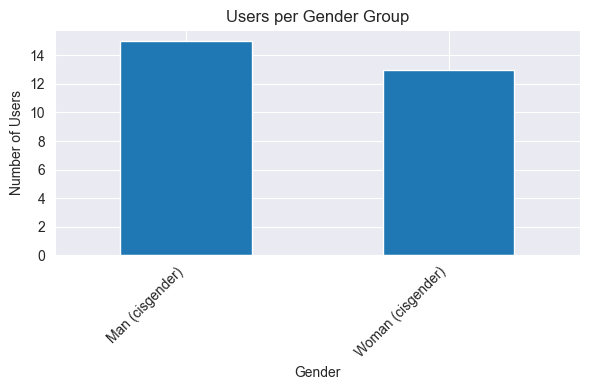

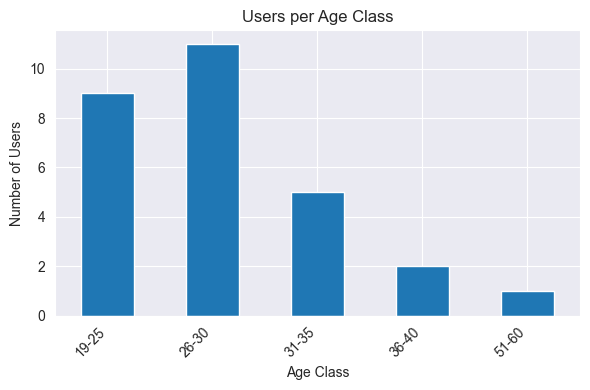

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_54850/1318352359.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['work_exp_group'] = pd.cut(filtered['work_exp_years'], bins=bins, labels=labels, right=True)


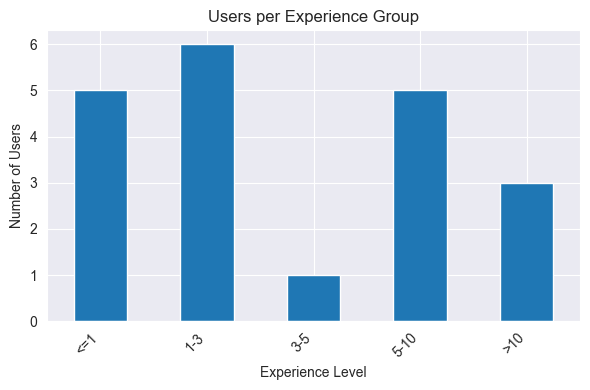

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_54850/1318352359.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['study_year_group'] = pd.cut(filtered['study_year'], bins=bins, labels=labels, right=True)


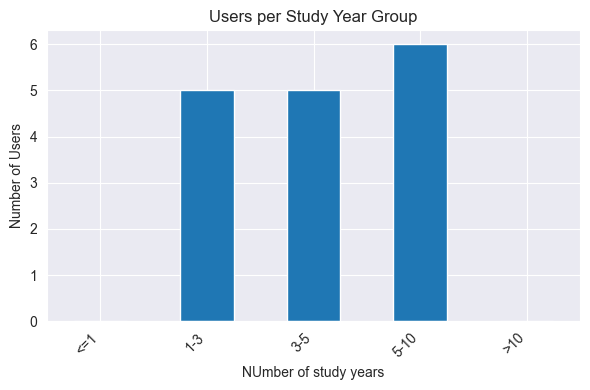

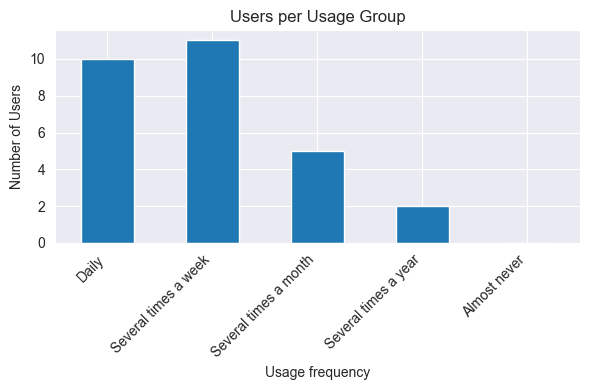

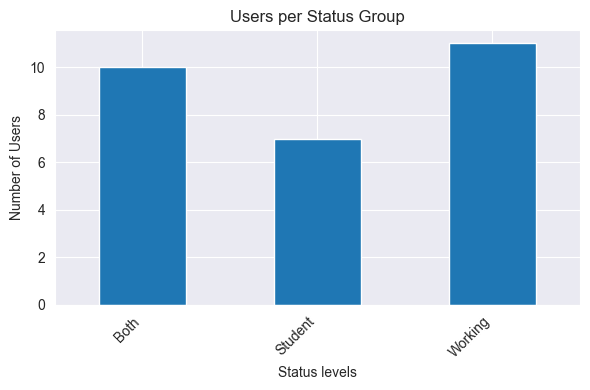

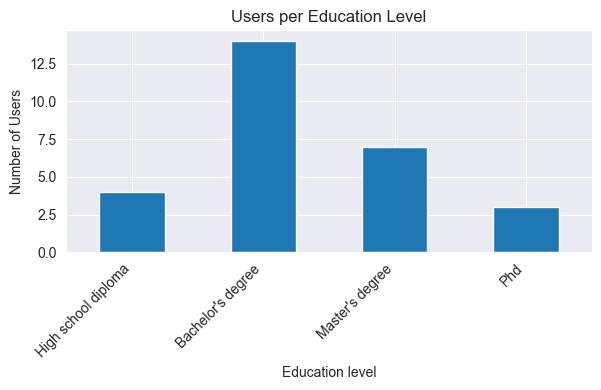

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_bar(data, column, title, xlabel, ylabel):
    ax = data[column].value_counts().sort_index().plot(kind="bar", figsize=(6,4))
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Number of users per gender group
plot_bar(users, 'gender', "Users per Gender Group", "Gender", "Number of Users")

# Number of users per age class
plot_bar(users, 'age', "Users per Age Class", "Age Class", "Number of Users")

users['work_exp_years'] = pd.to_numeric(users['work_exp_years'], errors='coerce')
filtered = users[(users['work_exp_years'] <= 50) & (users['work_exp_years'].notna())]
bins = [-float('inf'), 1, 3, 5, 10, float('inf')]
labels = ['<=1', '1-3', '3-5', '5-10', '>10']
filtered['work_exp_group'] = pd.cut(filtered['work_exp_years'], bins=bins, labels=labels, right=True)
plot_bar(filtered, 'work_exp_group', "Users per Experience Group", "Experience Level", "Number of Users")

users['study_year'] = pd.to_numeric(users['study_year'], errors='coerce')
filtered = users[(users['study_year'] <= 50) & (users['study_year'].notna())]
bins = [-float('inf'), 1, 3, 5, 10, float('inf')]
labels = ['<=1', '1-3', '3-5', '5-10', '>10']
filtered['study_year_group'] = pd.cut(filtered['study_year'], bins=bins, labels=labels, right=True)
plot_bar(filtered, 'study_year_group', "Users per Study Year Group", "NUmber of study years", "Number of Users")

usage_order = [
    "Daily",
    "Several times a week",
    "Several times a month",
    "Several times a year",
    "Almost never"
]
users['usage_frequency'] = pd.Categorical(
    users['usage_frequency'],
    categories=usage_order,
    ordered=True
)
plot_bar(users, 'usage_frequency', "Users per Usage Group", "Usage frequency", "Number of Users")


# Number of users per usage group (assumed column: usage)
plot_bar(users, 'status', "Users per Status Group", "Status levels", "Number of Users")

education_order = [
    "High school diploma",
    "Bachelor's degree",
    "Master's degree",
    "Phd",
]

users['education'] = pd.Categorical(
    users['education'],
    categories=education_order,
    ordered=True
)
plot_bar(users, 'education', "Users per Education Level", "Education level", "Number of Users")



## Demographic Data Gender Split


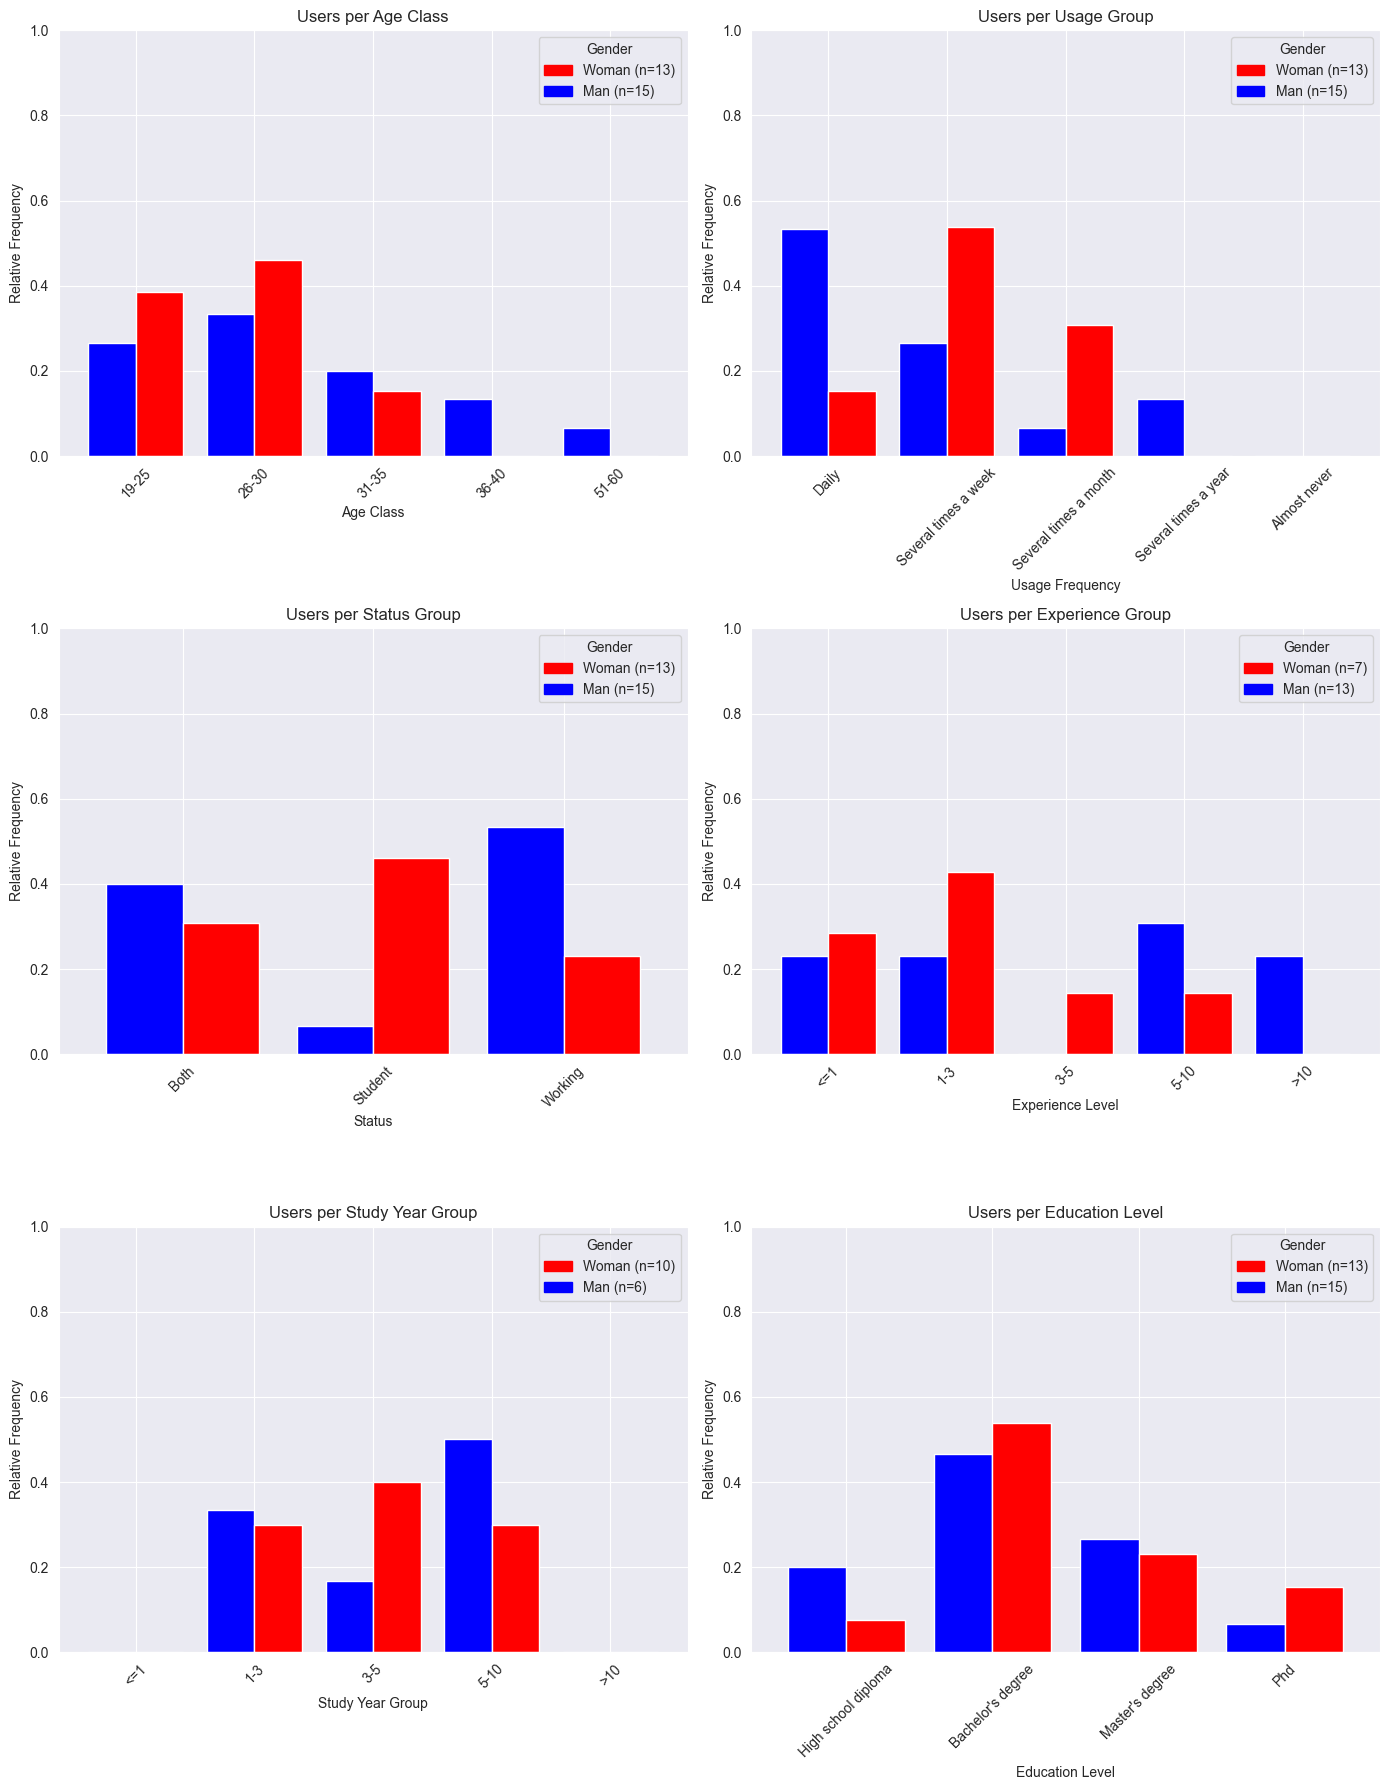

In [3]:
import matplotlib.pyplot as plt

def plot_bar_by_gender(
    data, column, title, xlabel, ylabel,
    ax=None, categories=None, category_order=None
):
    df = data.copy()
    if categories is not None:
        df = df[df[column].isin(categories)]
    df['gender'] = df['gender'].replace({'Woman (cisgender)': 'Woman', 'Man (cisgender)': 'Man'})
    counts = df.groupby([column, 'gender'], observed=True).size().unstack(fill_value=0)
    relative_freq = counts.div(counts.sum(axis=0), axis=1)
    if category_order is not None:
        relative_freq = relative_freq.reindex(category_order)
    else:
        relative_freq = relative_freq.sort_index()

    # Get the number of entries for each gender (in the filtered data)
    n_women = df[df['gender'] == 'Woman'].shape[0]
    n_men = df[df['gender'] == 'Man'].shape[0]

    colors = {'Woman': 'red', 'Man': 'blue'}
    plot = relative_freq.plot(
        kind="bar",
        color=[colors.get(g, None) for g in relative_freq.columns],
        width=0.8,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel.replace("Number of Users", "Relative Frequency"))
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=45)
    # Custom legend with gender counts
    custom_labels = [
        f'Woman (n={n_women})',
        f'Man (n={n_men})'
    ]
    handles = [plt.Rectangle((0,0),1,1, color=colors['Woman']),
               plt.Rectangle((0,0),1,1, color=colors['Man'])]
    ax.legend(handles, custom_labels, title='Gender')


# Prepare filtered and binned DataFrames
filtered_exp = users[(users['work_exp_years'] <= 50) & (users['work_exp_years'].notna())].copy()
filtered_exp['work_exp_group'] = pd.cut(filtered_exp['work_exp_years'], bins=bins, labels=labels, right=True)
filtered_study = users[(users['study_year'] <= 50) & (users['study_year'].notna())].copy()
filtered_study['study_year_group'] = pd.cut(filtered_study['study_year'], bins=bins, labels=labels, right=True)

fig, axes = plt.subplots(3, 2, figsize=(14, 18))
axes = axes.flatten()  # Flatten to easily iterate

# Each subplot
plot_bar_by_gender(users, 'age', "Users per Age Class", "Age Class", "Number of Users", ax=axes[0])
plot_bar_by_gender(users, 'usage_frequency', "Users per Usage Group", "Usage Frequency", "Number of Users",
                   ax=axes[1], category_order=usage_order)
plot_bar_by_gender(users, 'status', "Users per Status Group", "Status", "Number of Users", ax=axes[2])
plot_bar_by_gender(filtered_exp, 'work_exp_group', "Users per Experience Group", "Experience Level", "Number of Users",
                   ax=axes[3], category_order=labels)
plot_bar_by_gender(filtered_study, 'study_year_group', "Users per Study Year Group", "Study Year Group", "Number of Users",
                   ax=axes[4], category_order=labels)
plot_bar_by_gender(users, 'education', "Users per Education Level", "Education Level", "Number of Users",
                   ax=axes[5], category_order=education_order)

plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact

# Assume 'users' DataFrame has columns 'gender' and 'usage_frequency'
freq_table = pd.crosstab(users['gender'], users['usage_frequency'])
chi2, p, dof, expected = chi2_contingency(freq_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)

import pandas as pd
from scipy.stats import fisher_exact

# Assume 'users' DataFrame has columns: 'gender' and 'usage_frequency'
categories = users['usage_frequency'].dropna().unique()

# Only keep men/women cis
users_sub = users[users['gender'].isin(['Man (cisgender)', 'Woman (cisgender)'])].copy()

results = []

for cat in categories:
    # 2x2 contingency table
    # Row 1: Woman (cisgender), Row 2: Man (cisgender)
    # Col 1: Category present, Col 2: Other categories
    table = [
        [
            ((users_sub['gender'] == 'Woman (cisgender)') & (users_sub['usage_frequency'] == cat)).sum(),
            ((users_sub['gender'] == 'Woman (cisgender)') & (users_sub['usage_frequency'] != cat)).sum()
        ],
        [
            ((users_sub['gender'] == 'Man (cisgender)') & (users_sub['usage_frequency'] == cat)).sum(),
            ((users_sub['gender'] == 'Man (cisgender)') & (users_sub['usage_frequency'] != cat)).sum()
        ]
    ]
    # Only test if both rows and columns have >0
    if all(sum(row) > 0 for row in table) and all(sum(col) > 0 for col in zip(*table)):
        odds_ratio, p = fisher_exact(table)
        results.append({'category': cat, 'odds_ratio': odds_ratio, 'p_value': p, 'table': table})
    else:
        results.append({'category': cat, 'odds_ratio': None, 'p_value': None, 'table': table})

# Print or convert to DataFrame for easier viewing
results_df = pd.DataFrame(results)
print(results_df[['category', 'p_value', 'odds_ratio', 'table']])





Chi-square statistic: 8.116736596736597
p-value: 0.0436597257929016
                category   p_value  odds_ratio               table
0                  Daily  0.054571    0.159091   [[2, 11], [8, 7]]
1   Several times a week  0.245810    3.208333   [[7, 6], [4, 11]]
2  Several times a month  0.152778    6.222222   [[4, 9], [1, 14]]
3   Several times a year  0.484127    0.000000  [[0, 13], [2, 13]]


## LLM Usage gender split


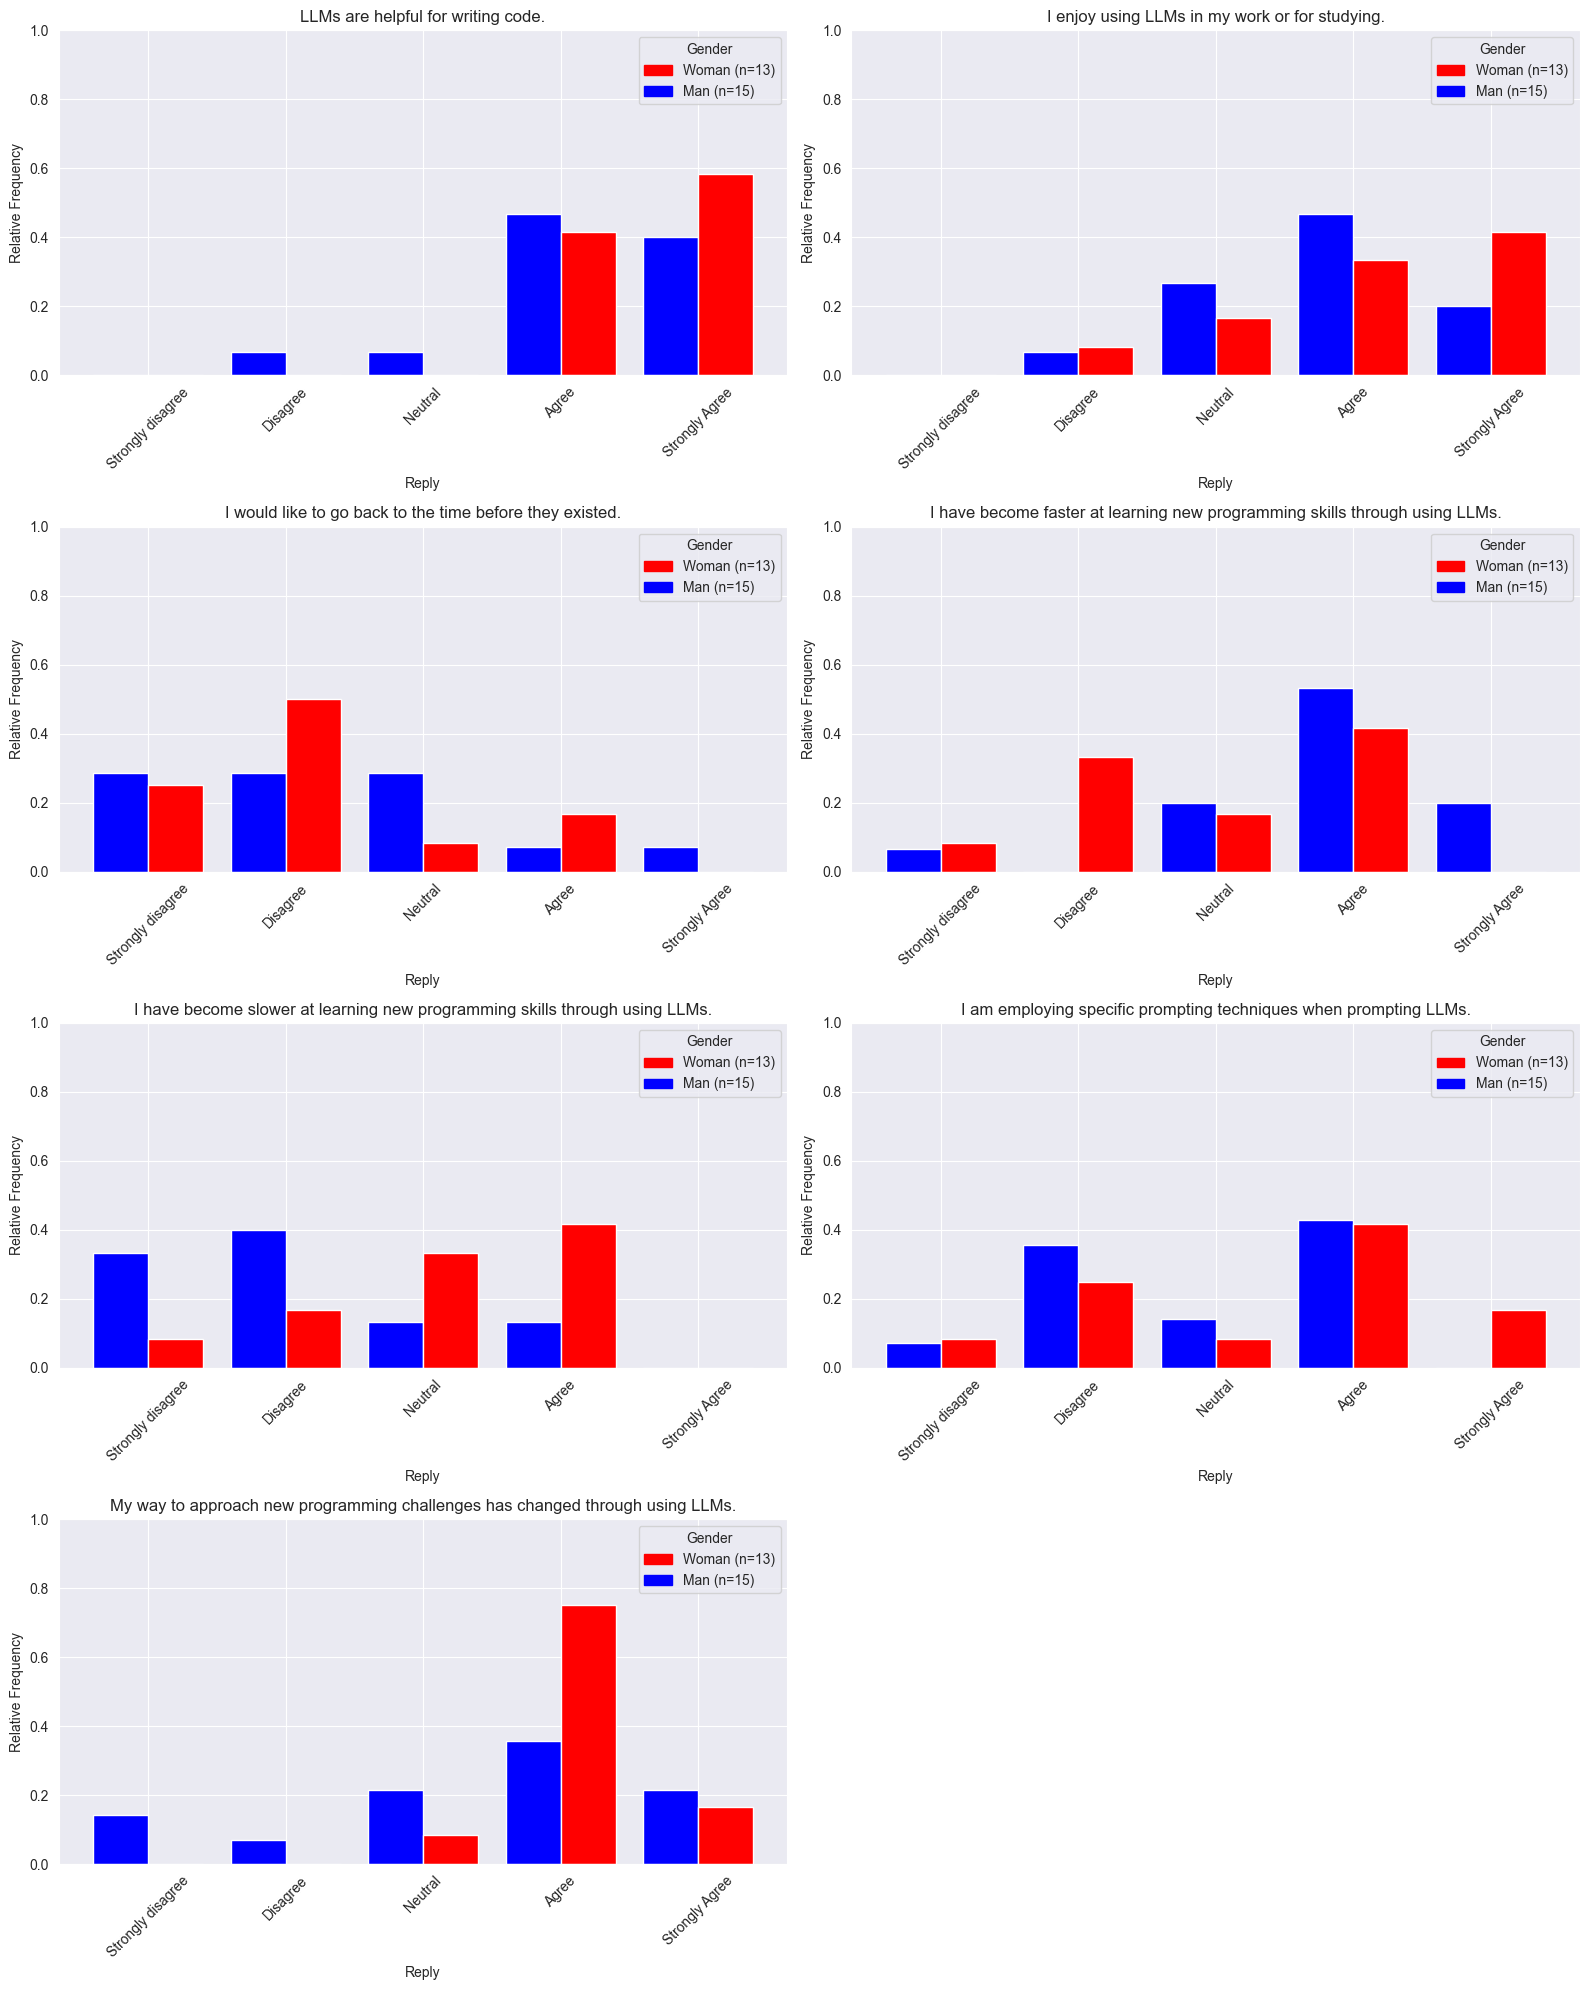

In [5]:
import matplotlib.pyplot as plt

response_order_agree = [
    "Strongly disagree",
    "Disagree",
    "Neutral",
    "Agree",
    "Strongly Agree"
]

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

plot_bar_by_gender(users, 'llms_helpful', "LLMs are helpful for writing code.", "Reply", "Number of Users", ax=axes[0], category_order=response_order_agree)
plot_bar_by_gender(users, 'llms_enjoy', "I enjoy using LLMs in my work or for studying.", "Reply", "Number of Users", ax=axes[1], category_order=response_order_agree)
plot_bar_by_gender(users, 'llms_go_back', "I would like to go back to the time before they existed.", "Reply", "Number of Users", ax=axes[2], category_order=response_order_agree)
plot_bar_by_gender(users, 'llms_faster', "I have become faster at learning new programming skills through using LLMs.", "Reply", "Number of Users", ax=axes[3], category_order=response_order_agree)
plot_bar_by_gender(users, 'llms_slower', "I have become slower at learning new programming skills through using LLMs.", "Reply", "Number of Users", ax=axes[4], category_order=response_order_agree)
plot_bar_by_gender(users, 'llms_prompt_engineering', "I am employing specific prompting techniques when prompting LLMs.", "Reply", "Number of Users", ax=axes[5], category_order=response_order_agree)
plot_bar_by_gender(users, 'llms_approach', "My way to approach new programming challenges has changed through using LLMs.", "Reply", "Number of Users", ax=axes[6], category_order=response_order_agree)

# Hide the last unused subplot
fig.delaxes(axes[7])

plt.tight_layout()
plt.show()

## Additional questions gender split

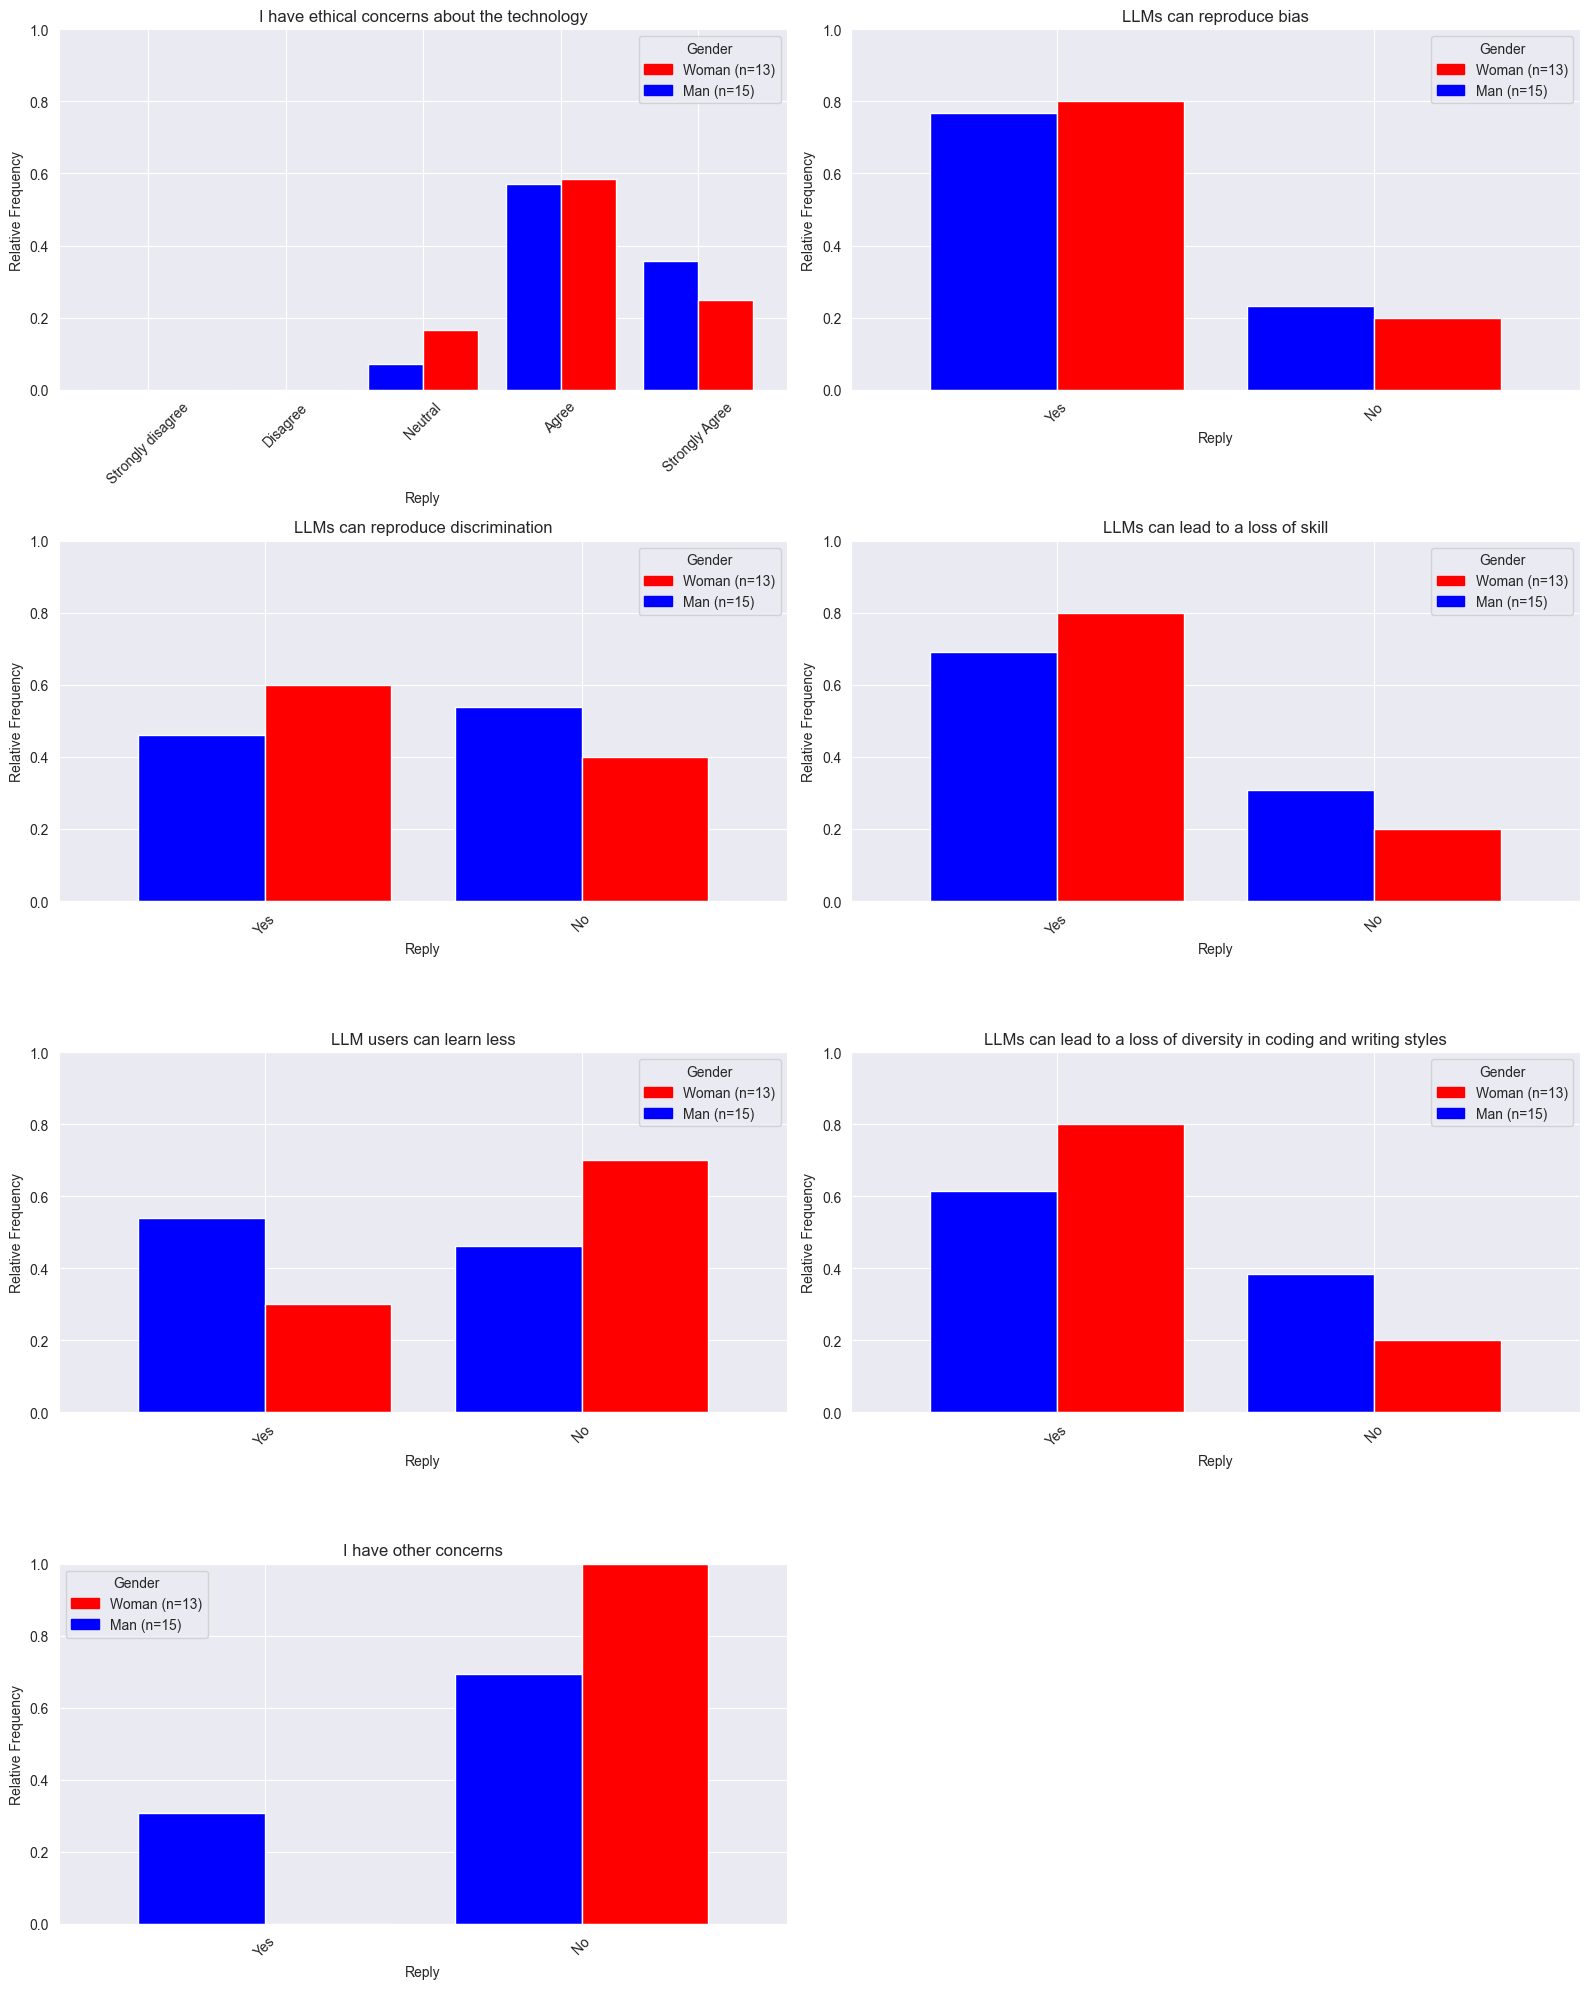

In [6]:
import matplotlib.pyplot as plt

response_order_agree = [
    "Strongly disagree",
    "Disagree",
    "Neutral",
    "Agree",
    "Strongly Agree"
]

response_order_yes_no = [
    "Yes",
    "No",
]

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

plot_bar_by_gender(users, 'llms_ethical_concerns', "I have ethical concerns about the technology", "Reply", "Number of Users", ax=axes[0], category_order=response_order_agree)
plot_bar_by_gender(users, 'llms_ec_bias', "LLMs can reproduce bias", "Reply", "Number of Users", ax=axes[1], category_order=response_order_yes_no)
plot_bar_by_gender(users, 'llms_ec_discrimination', "LLMs can reproduce discrimination", "Reply", "Number of Users", ax=axes[2], category_order=response_order_yes_no)
plot_bar_by_gender(users, 'llms_ec_skill_loss', "LLMs can lead to a loss of skill", "Reply", "Number of Users", ax=axes[3], category_order=response_order_yes_no)
plot_bar_by_gender(users, 'llms_ec_learn_less', "LLM users can learn less", "Reply", "Number of Users", ax=axes[4], category_order=response_order_yes_no)
plot_bar_by_gender(users, 'llms_ec_diversity_loss', "LLMs can lead to a loss of diversity in coding and writing styles", "Reply", "Number of Users", ax=axes[5], category_order=response_order_yes_no)
plot_bar_by_gender(users, 'llms_ec_other', "I have other concerns", "Reply", "Number of Users", ax=axes[6], category_order=response_order_yes_no)

# Hide the empty (8th) subplot
fig.delaxes(axes[7])

plt.tight_layout()
plt.show()

## Chi square

In [7]:
import pandas as pd
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests
import numpy as np

def chi_square_test_by_gender(df, col_category, col_gender='gender'):
    contingency = pd.crosstab(df[col_gender], df[col_category])
    chi2, p, dof, expected = chi2_contingency(contingency)
    n = contingency.sum().sum()
    k = min(contingency.shape)
    # Calculate Cramér's V
    cramers_v = np.sqrt(chi2 / (n * (k - 1))) if k > 1 else np.nan

    n_male = contingency.loc['Man (cisgender)'].sum() if 'Man (cisgender)' in contingency.index else 0
    n_female = contingency.loc['Woman (cisgender)'].sum() if 'Woman (cisgender)' in contingency.index else 0
    categories = contingency.columns.tolist()
    return {
        'chi2': chi2,
        'p_value': p,
        'dof': dof,
        'expected': expected,
        'observed': contingency,
        'N_male': n_male,
        'N_female': n_female,
        'col_categories': categories,
        'cramers_v': cramers_v   # add Cramér's V to the output
    }

def batch_chi_square_with_correction(df, columns, col_gender='gender', alpha=0.05):
    results = []
    for col in columns:
        r = chi_square_test_by_gender(df, col, col_gender)
        results.append({
            'variable': col,
            'chi2': r['chi2'],
            'dof': r['dof'],
            'p_value': r['p_value'],
            'observed': r['observed'],
            'N_male': r['N_male'],
            'N_female': r['N_female'],
            'col_categories': r['col_categories'],
            'cramers_v': r['cramers_v'] # add Cramér's V here
        })
    df_results = pd.DataFrame(results)
    reject, pvals_corrected, _, _ = multipletests(df_results['p_value'], alpha=alpha, method='fdr_bh')
    df_results['p_value_corrected'] = pvals_corrected
    df_results['significant'] = reject
    return df_results

In [8]:
def chi2_results_to_latex(df, var_label="variable"):
    """
    Given a DataFrame with columns: variable, chi2, dof, p_value, p_value_corrected, N_male, N_female, cramers_v,
    returns a LaTeX table as a string, with the variable name as the first column.
    """
    latex_header = (
        "\\begin{tabular}{l l r r r r r}\n"
        "\\toprule\n"
        "Variable & Statistic & $p$ & $p_{\\mathrm{corr}}$ & Cram\\'er~V & $N_{male}$ & $N_{female}$ \\\\\n"
        "\\midrule\n"
    )
    table_body = ""
    for _, row in df.iterrows():
        n_total = int(row['N_male']) + int(row['N_female'])
        stat = f"$\\chi^2$ ({int(row['dof'])}, $N$={n_total}) = {row['chi2']:.2f}"
        p = f"{row['p_value']:.3f}"
        p_corr = f"{row['p_value_corrected']:.3f}"
        cramers_v = f"{row['cramers_v']:.3f}" if not pd.isnull(row['cramers_v']) else "-"
        n_male = int(row['N_male'])
        n_female = int(row['N_female'])
        variable = row[var_label]
        table_body += f"{variable} & {stat} & {p} & {p_corr} & {cramers_v} & {n_male} & {n_female} \\\\\n"

    latex_footer = "\\bottomrule\n\\end{tabular}"
    return latex_header + table_body + latex_footer

In [11]:
import pandas as pd
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests
import numpy as np

# Define the genders you expect in your data
GENDER_MALE = 'Man (cisgender)'
GENDER_FEMALE = 'Woman (cisgender)'

tests = [
    (users, "age"),
    (users, "usage_frequency"),
    (users, "status"),
    (filtered_exp, "work_exp_group"),
    (filtered_study, "study_year_group"),
    (users, "education"),
]

results = []
for df, col in tests:
    crosstab = pd.crosstab(df["gender"], df[col])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    N_male = crosstab.loc[GENDER_MALE].sum() if GENDER_MALE in crosstab.index else 0
    N_female = crosstab.loc[GENDER_FEMALE].sum() if GENDER_FEMALE in crosstab.index else 0
    col_categories = crosstab.columns.tolist()
    # Compute Cramér's V
    n = crosstab.sum().sum()
    k = min(crosstab.shape)
    cramers_v = np.sqrt(chi2 / (n * (k - 1))) if k > 1 else np.nan
    results.append({
        'variable': col,
        'p_value': p,
        'chi2': chi2,
        'dof': dof,
        'N_male': N_male,
        'N_female': N_female,
        'col_categories': col_categories,
        'cramers_v': cramers_v,           # <--- Added here
    })

results_df = pd.DataFrame(results)
results_df["p_value_corrected"] = multipletests(
    results_df["p_value"], method='fdr_bh'
)[1]
results_df["significant"] = results_df["p_value_corrected"] < 0.05

print(results_df[["variable", "chi2", "p_value", "p_value_corrected", "significant",
                  "N_male", "N_female", "col_categories", "cramers_v"]])
latex_table = chi2_results_to_latex(results_df)     # chi2_results_to_latex should also be updated for cramers_v
print(latex_table)

           variable      chi2   p_value  p_value_corrected  significant  \
0               age  3.275877  0.512763           0.703975        False   
1   usage_frequency  8.116737  0.043660           0.139781        False   
2            status  6.132587  0.046594           0.139781        False   
3    work_exp_group  4.615385  0.329084           0.658168        False   
4  study_year_group  1.066667  0.586646           0.703975        False   
5         education  1.340171  0.719617           0.719617        False   

   N_male  N_female                                     col_categories  \
0      15        13                [19-25, 26-30, 31-35, 36-40, 51-60]   
1      15        13  [Daily, Several times a week, Several times a ...   
2      15        13                           [Both, Student, Working]   
3      13         7                         [<=1, 1-3, 3-5, 5-10, >10]   
4       6        10                                   [1-3, 3-5, 5-10]   
5      15        13  [High sch

In [12]:
# Columns based on your plots
columns_to_test = [
    'llms_helpful',
    'llms_enjoy',
    'llms_go_back',
    'llms_faster',
    'llms_slower',
    'llms_prompt_engineering',
    'llms_approach'
]

# Run tests
results_df = batch_chi_square_with_correction(users, columns_to_test)

# Display summary table of main results, including Cramér's V
print(results_df[['variable', 'chi2', 'dof', 'p_value', 'p_value_corrected', 'cramers_v', 'significant']])

latex_table = chi2_results_to_latex(results_df)
print(latex_table)

                  variable      chi2  dof   p_value  p_value_corrected  \
0             llms_helpful  2.102885    3  0.551329           0.643141   
1               llms_enjoy  1.672159    3  0.643141           0.643141   
2             llms_go_back  3.543311    4  0.471323           0.643141   
3              llms_faster  7.653462    4  0.105130           0.367954   
4              llms_slower  6.364286    3  0.095171           0.367954   
5  llms_prompt_engineering  2.786887    4  0.594098           0.643141   
6            llms_approach  5.219898    4  0.265469           0.619429   

   cramers_v  significant  
0   0.279078        False  
1   0.248861        False  
2   0.369163        False  
3   0.532411        False  
4   0.485504        False  
5   0.327396        False  
6   0.448068        False  
\begin{tabular}{l l r r r r r}
\toprule
Variable & Statistic & $p$ & $p_{\mathrm{corr}}$ & Cram\'er~V & $N_{male}$ & $N_{female}$ \\
\midrule
llms_helpful & $\chi^2$ (3, $N$=27) = 2.1

In [13]:
columns = [
    'llms_ethical_concerns',
    'llms_ec_bias',
    'llms_ec_discrimination',
    'llms_ec_skill_loss',
    'llms_ec_learn_less',
    'llms_ec_diversity_loss',
    'llms_ec_other',
]
results_df = batch_chi_square_with_correction(users, columns)
print(results_df[['variable', 'chi2', 'dof', 'p_value', 'p_value_corrected', 'cramers_v', 'significant']])
latex_table = chi2_results_to_latex(results_df)
print(latex_table)

                 variable      chi2  dof   p_value  p_value_corrected  \
0   llms_ethical_concerns  0.750595    2  0.687085                1.0   
1            llms_ec_bias  0.000000    1  1.000000                1.0   
2  llms_ec_discrimination  0.056629    1  0.811906                1.0   
3      llms_ec_skill_loss  0.010841    1  0.917074                1.0   
4      llms_ec_learn_less  0.517500    1  0.471910                1.0   
5  llms_ec_diversity_loss  0.246823    1  0.619321                1.0   
6           llms_ec_other  1.890865    1  0.169104                1.0   

   cramers_v  significant  
0   0.169909        False  
1   0.000000        False  
2   0.049620        False  
3   0.021710        False  
4   0.150000        False  
5   0.103593        False  
6   0.286726        False  
\begin{tabular}{l l r r r r r}
\toprule
Variable & Statistic & $p$ & $p_{\mathrm{corr}}$ & Cram\'er~V & $N_{male}$ & $N_{female}$ \\
\midrule
llms_ethical_concerns & $\chi^2$ (2, $N$=26) = 0.

## Correlations

Correlation between usage_frequency and work_exp_years: -0.212


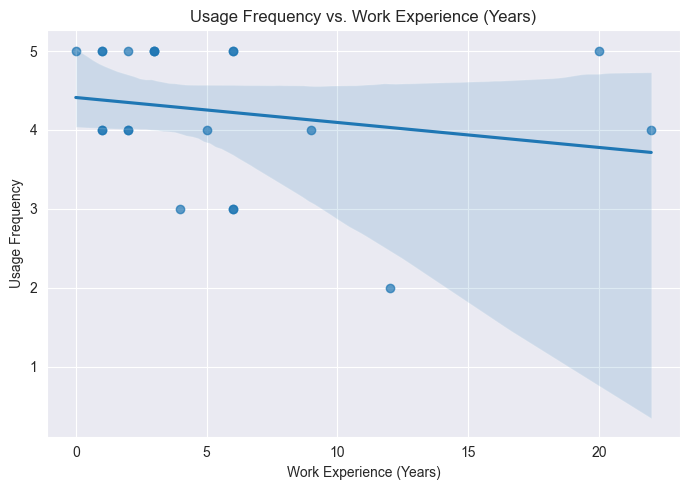

,user_id,lastpage,seed,age,education,status,study_field,study_year,work_field,work_exp_years,...,llms_ethical_concerns,llms_ec_bias,llms_ec_discrimination,llms_ec_skill_loss,llms_ec_learn_less,llms_ec_diversity_loss,llms_ec_other,llms_other_concerns,llms_other_thoughts,usage_frequency_num
0,6,8,1673258229,19-25,Bachelor's degree,Both,Data Science (M.Sc),2026.0,Data engineer in auomotive company,3.0,...,Agree,No,No,No,No,No,Yes,LLMs can use code protected from specific usage,None,5
1,8,8,1155338690,19-25,Bachelor's degree,Both,Computer-aided design (CAD) (B.A),5.0,Computer vision,1.0,...,Agree,Yes,No,Yes,Yes,No,No,None,None,4
2,11,8,1462336171,26-30,Bachelor's degree,Both,Informatik (B.Sc.),4.0,Research assistant,1.0,...,Agree,Yes,Yes,Yes,Yes,Yes,No,None,None,4
3,15,8,1937126585,26-30,Phd,Working,None,NaN,Immunology research and biomedical analytics s...,6.0,...,Agree,Yes,No,Yes,Yes,Yes,No,None,"Programming, problem solving and comprehension...",5
5,25,8,1442054330,26-30,Bachelor's degree,Working,None,NaN,Software engineering for the web,6.0,...,Neutral,None,None,None,None,None,None,None,It produces a lot of very bad unmaintainable c...,5
6,28,8,1943323569,31-35,Phd,Working,None,NaN,Research on LLMs for transparency and responsi...,5.0,...,Agree,Yes,No,Yes,No,Yes,No,None,They might reduce people's creative thinking.,4
9,31,8,1395672098,36-40,High school diploma (Abitur or equivalent),Working,None,NaN,Software Engineering,22.0,...,Strongly Agree,Yes,Yes,Yes,No,Yes,Yes,LLMs might reduce the motivation to publish kn...,"As a coding assistant, at the current state, L...",4
10,34,8,1374827140,51-60,Master's degree,Working,None,NaN,Interface design and Software architeture,20.0,...,Agree,No,No,Yes,No,No,No,None,Too many to write into this box.,5
11,46,8,217230409,31-35,Bachelor's degree,Working,None,NaN,Software engineering in an e-commerce company,12.0,...,Strongly Agree,Yes,Yes,Yes,Yes,Yes,No,None,None,2
14,55,8,2025687955,26-30,Bachelor's degree,Both,Computer Science,4.0,Software engineering,2.0,...,Agree,No,No,Yes,No,Yes,No,None,None,5


In [27]:
import seaborn as sns

freq_order = [
    "Daily",
    "Several times a week",
    "Several times a month",
    "Several times a year",
    "Almost never"
]
# Map each category to a numeric value (e.g., 5 for "Daily", 1 for "Almost never")
freq_map = {cat: i for i, cat in enumerate(reversed(freq_order), 1)}

users["usage_frequency_num"] = users["usage_frequency"].map(freq_map)

# Now you can compute the correlation
# Make sure to also handle work_exp_years as numeric
users["work_exp_years"] = pd.to_numeric(users["work_exp_years"], errors='coerce')
filtered = users[users["work_exp_years"] <= 50]
df_corr = filtered.dropna(subset=["usage_frequency_num", "work_exp_years"])
correlation = df_corr["usage_frequency_num"].corr(df_corr["work_exp_years"])

print(f"Correlation between usage_frequency and work_exp_years: {correlation:.3f}")

# Plot scatter plot
plt.figure(figsize=(7,5))
sns.regplot(x='work_exp_years', y='usage_frequency_num', data=df_corr, scatter_kws={'alpha':0.7})
plt.title('Usage Frequency vs. Work Experience (Years)')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Usage Frequency')
plt.tight_layout()
plt.show()

df_corr


### Experience Years and Gender

Correlation between usage_frequency and work_exp_years: -0.243


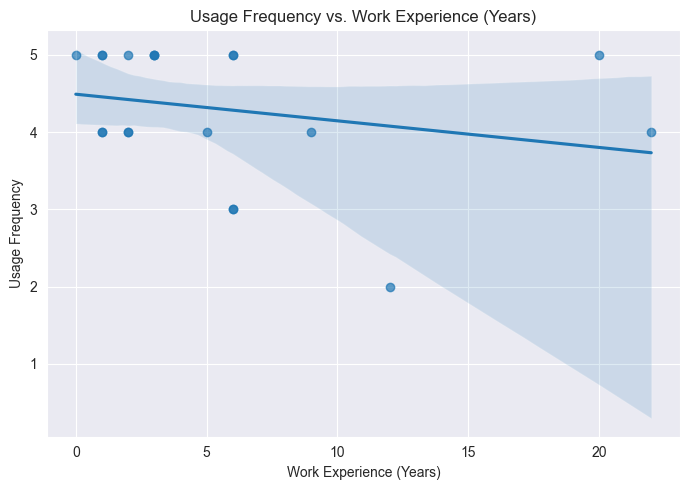

,user_id,lastpage,seed,age,education,status,study_field,study_year,work_field,work_exp_years,...,llms_ethical_concerns,llms_ec_bias,llms_ec_discrimination,llms_ec_skill_loss,llms_ec_learn_less,llms_ec_diversity_loss,llms_ec_other,llms_other_concerns,llms_other_thoughts,usage_frequency_num
0,6,8,1673258229,19-25,Bachelor's degree,Both,Data Science (M.Sc),2026.0,Data engineer in auomotive company,3.0,...,Agree,No,No,No,No,No,Yes,LLMs can use code protected from specific usage,None,5
1,8,8,1155338690,19-25,Bachelor's degree,Both,Computer-aided design (CAD) (B.A),5.0,Computer vision,1.0,...,Agree,Yes,No,Yes,Yes,No,No,None,None,4
2,11,8,1462336171,26-30,Bachelor's degree,Both,Informatik (B.Sc.),4.0,Research assistant,1.0,...,Agree,Yes,Yes,Yes,Yes,Yes,No,None,None,4
3,15,8,1937126585,26-30,Phd,Working,None,NaN,Immunology research and biomedical analytics s...,6.0,...,Agree,Yes,No,Yes,Yes,Yes,No,None,"Programming, problem solving and comprehension...",5
5,25,8,1442054330,26-30,Bachelor's degree,Working,None,NaN,Software engineering for the web,6.0,...,Neutral,None,None,None,None,None,None,None,It produces a lot of very bad unmaintainable c...,5
6,28,8,1943323569,31-35,Phd,Working,None,NaN,Research on LLMs for transparency and responsi...,5.0,...,Agree,Yes,No,Yes,No,Yes,No,None,They might reduce people's creative thinking.,4
9,31,8,1395672098,36-40,High school diploma (Abitur or equivalent),Working,None,NaN,Software Engineering,22.0,...,Strongly Agree,Yes,Yes,Yes,No,Yes,Yes,LLMs might reduce the motivation to publish kn...,"As a coding assistant, at the current state, L...",4
10,34,8,1374827140,51-60,Master's degree,Working,None,NaN,Interface design and Software architeture,20.0,...,Agree,No,No,Yes,No,No,No,None,Too many to write into this box.,5
11,46,8,217230409,31-35,Bachelor's degree,Working,None,NaN,Software engineering in an e-commerce company,12.0,...,Strongly Agree,Yes,Yes,Yes,Yes,Yes,No,None,None,2
14,55,8,2025687955,26-30,Bachelor's degree,Both,Computer Science,4.0,Software engineering,2.0,...,Agree,No,No,Yes,No,Yes,No,None,None,5


In [5]:
import seaborn as sns

freq_order = [
    "Daily",
    "Several times a week",
    "Several times a month",
    "Several times a year",
    "Almost never"
]
# Map each category to a numeric value (e.g., 5 for "Daily", 1 for "Almost never")
freq_map = {cat: i for i, cat in enumerate(reversed(freq_order), 1)}

users["usage_frequency_num"] = users["usage_frequency"].map(freq_map)

# Now you can compute the correlation
# Make sure to also handle work_exp_years as numeric
users["work_exp_years"] = pd.to_numeric(users["work_exp_years"], errors='coerce')
filtered = users[users["work_exp_years"] <= 50]
df_corr = filtered.dropna(subset=["usage_frequency_num", "work_exp_years"])
correlation = df_corr["usage_frequency_num"].corr(df_corr["work_exp_years"])

print(f"Correlation between usage_frequency and work_exp_years: {correlation:.3f}")

# Plot scatter plot
plt.figure(figsize=(7,5))
sns.regplot(x='work_exp_years', y='usage_frequency_num', data=df_corr, scatter_kws={'alpha':0.7})
plt.title('Usage Frequency vs. Work Experience (Years)')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Usage Frequency')
plt.tight_layout()
plt.show()

df_corr

In [10]:
filtered

,user_id,lastpage,seed,age,education,status,study_field,study_year,work_field,work_exp_years,...,llms_ethical_concerns,llms_ec_bias,llms_ec_discrimination,llms_ec_skill_loss,llms_ec_learn_less,llms_ec_diversity_loss,llms_ec_other,llms_other_concerns,llms_other_thoughts,study_year_group
1,8,8,1155338690,19-25,Bachelor's degree,Both,Computer-aided design (CAD) (B.A),5.0,Computer vision,1.0,...,Agree,Yes,No,Yes,Yes,No,No,None,None,3-5
2,11,8,1462336171,26-30,Bachelor's degree,Both,Informatik (B.Sc.),4.0,Research assistant,1.0,...,Agree,Yes,Yes,Yes,Yes,Yes,No,None,None,3-5
4,16,8,1979098288,19-25,Bachelor's degree,Student,Computer Engineering (M.Sc.),2.0,None,NaN,...,Agree,Yes,Yes,No,No,Yes,No,None,Sometimes when I am in a hurry I don´t check p...,1-3
7,29,8,978929840,26-30,Master's degree,Student,PhD in Computer Science,3.0,None,NaN,...,Agree,Yes,No,No,Yes,Yes,No,None,None,1-3
13,48,8,2031177185,19-25,Bachelor's degree,Student,Information Systems Management (M.Sc.),6.0,None,NaN,...,Strongly Agree,Yes,Yes,Yes,No,Yes,No,None,- tbh it accelerates processes a lot\n- LLMs m...,5-10
14,55,8,2025687955,26-30,Bachelor's degree,Both,Computer Science,4.0,Software engineering,2.0,...,Agree,No,No,Yes,No,Yes,No,None,None,3-5
16,60,8,1849077149,19-25,High school diploma (Abitur or equivalent),Student,Physik (B.Sc.),5.0,None,NaN,...,Strongly Agree,Yes,Yes,Yes,No,Yes,No,None,None,3-5
17,63,3,831754724,26-30,Bachelor's degree,Both,"Remote Sensing, GeoInformation and Visualisati...",6.0,Data analysis and visualisation for a newspaper,2.0,...,None,None,None,None,None,None,None,None,None,5-10
18,65,8,151250910,19-25,Bachelor's degree,Student,Geoinformation,2.0,None,NaN,...,Agree,No,No,Yes,No,Yes,No,None,From a beginner’s perspective it’s temping to ...,1-3
19,73,8,712726586,31-35,Bachelor's degree,Student,Computer Science (M.Sc.),8.0,None,NaN,...,Agree,Yes,Yes,Yes,Yes,No,No,None,I fear that this will lead to more stress in t...,5-10
